In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('K03_counter_strike_2.csv')

In [7]:
print(data.head())

   time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets round_winner  
0       0.0      0.0    4000.0   4000.0         0.0        0.0           CT  
1     400.0    300.0     600.0    650.0         0.0        0.0           CT  
2     294.0    200.0     750.0    500.0         0.0        0.0           CT  
3     294.0    200.0     750.0    500.0         0.0        0.0           CT  
4     192.0      0.0   18350.0  10750.0         0.0        0.0           CT  


In [9]:
print(data.isnull().sum())

time_left       0
ct_score        0
t_score         0
map             0
bomb_planted    0
ct_health       0
t_health        0
ct_armor        0
t_armor         0
ct_money        0
t_money         0
ct_helmets      0
t_helmets       0
round_winner    0
dtype: int64


In [11]:
data.dropna(inplace=True)

In [32]:
label_encoder = LabelEncoder()         

In [34]:
data['map'] = label_encoder.fit_transform(data['map'])
data['round_winner'] = label_encoder.fit_transform(data['round_winner'])

In [36]:
X = data.drop(columns=['round_winner']) 
y = data['round_winner']                  

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)y_pred = model.predict(X_test)

DecisionTreeClassifier(random_state=42)

In [42]:
y_pred = model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', classification_report(y_test, y_pred))

Akurasi: 0.85
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       156
           1       0.88      0.88      0.88       244

    accuracy                           0.85       400
   macro avg       0.84      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriks:\n', conf_matrix)

Matriks:
 [[127  29]
 [ 30 214]]


In [48]:
from sklearn.tree import plot_tree

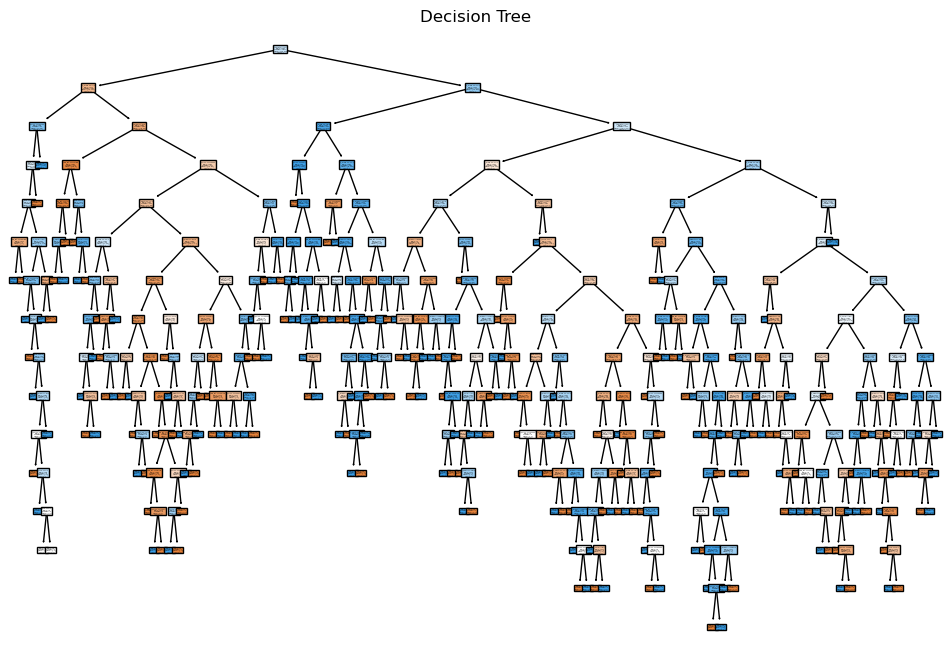

In [53]:
plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.title('Decision Tree')
plt.show()